<a href="https://colab.research.google.com/github/lordoz234/ML/blob/master/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [643]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
data = pd.read_csv('/content/drive/My Drive/files/ku2.csv')

In [646]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   files                         2503 non-null   object 
 1   is_eulerian                   2503 non-null   bool   
 2   degree                        2503 non-null   int64  
 3   is_multigraphical             2503 non-null   bool   
 4   is_pseudographical            2503 non-null   bool   
 5   maximal_matching              2503 non-null   int64  
 6   number_of_cliques             2503 non-null   int64  
 7   rich_club_coefficient         2503 non-null   float64
 8   average_shortest_path_length  2503 non-null   float64
 9   s_metric                      2503 non-null   float64
 10  wiener_index                  2503 non-null   float64
 11  population                    2503 non-null   object 
 12  super_population              2503 non-null   object 
dtypes: 

In [647]:
data.sample(3)

,files,is_eulerian,degree,is_multigraphical,is_pseudographical,maximal_matching,number_of_cliques,rich_club_coefficient,average_shortest_path_length,s_metric,wiener_index,population,super_population
1627,NA19093.txt,False,716,True,True,18,691,0.028566,1.971434,46376100.0,469980.0,YRI,AFR
389,HG01613.txt,False,714,True,True,13,665,0.008995,1.991005,3944196.0,439574.0,IBS,EUR
419,NA18644.txt,True,716,False,False,18,652,0.030251,1.969749,41216400.0,418032.0,CHB,EAS


In [0]:
data['is_eulerian'] = data['is_eulerian'].map({True: 1, False: 0})
data['is_multigraphical'] = data['is_multigraphical'].map({True: 1, False: 0})
data['is_pseudographical'] = data['is_pseudographical'].map({True: 1, False: 0})

In [649]:
data.sample(3)

,files,is_eulerian,degree,is_multigraphical,is_pseudographical,maximal_matching,number_of_cliques,rich_club_coefficient,average_shortest_path_length,s_metric,wiener_index,population,super_population
2049,NA19023.txt,1,715,1,1,18,688,0.028689,1.971311,45968400.0,465876.0,LWK,AFR
330,NA21115.txt,1,710,0,0,18,642,0.024650,1.975350,25725184.0,406450.0,GIH,SAS
2102,HG02138.txt,1,716,0,0,20,650,0.030343,1.969657,40960000.0,415450.0,KHV,EAS


In [0]:
data['population'] = data['population'].map({'ASW': 1, 'YRI': 2, 'LWK': 3, 'JPT': 4, 'CDX': 5, 'CEU': 6, 'CHB': 7, 'GIH': 8, 'GWD': 9, 'MSL': 10, 'IBS': 11, 
                                             'TSI': 12, 'PJL': 13, 'ESN': 14, 'MXL': 15, 'CLM': 16, 'PEL': 17, 'CHS': 18, 'PUR': 19, 'FIN': 20, 'KHV': 21,
                                             'BEB': 22, 'ACB': 23, 'ITU': 24, 'GBR': 25, 'STU': 26})
data['super_population'] = data['super_population'].map({'EUR': 1, 'EAS': 2, 'AMR': 3, 'SAS': 4, 'AFR': 5})

In [651]:
data.set_index(["super_population", "population"]).count(level="population")

,files,is_eulerian,degree,is_multigraphical,is_pseudographical,maximal_matching,number_of_cliques,rich_club_coefficient,average_shortest_path_length,s_metric,wiener_index
population,,,,,,,,,,,
1,61,61,61,61,61,61,61,61,61,61,61
2,107,107,107,107,107,107,107,107,107,107,107
3,99,99,99,99,99,99,99,99,99,99,99
4,104,104,104,104,104,104,104,104,104,104,104
5,93,93,93,93,93,93,93,93,93,93,93
6,99,99,99,99,99,99,99,99,99,99,99
7,103,103,103,103,103,103,103,103,103,103,103
8,103,103,103,103,103,103,103,103,103,103,103
9,113,113,113,113,113,113,113,113,113,113,113


In [652]:
data.sample(3)

,files,is_eulerian,degree,is_multigraphical,is_pseudographical,maximal_matching,number_of_cliques,rich_club_coefficient,average_shortest_path_length,s_metric,wiener_index,population,super_population
1149,HG03640.txt,0,709,1,1,653,668,0.026623,1.973377,35176761.0,439625.0,13,4
1394,HG01870.txt,0,716,0,0,653,659,0.026982,1.973018,34222500.0,427772.0,21,2
424,HG00653.txt,0,716,0,0,18,641,0.024688,1.975312,25644096.0,405176.0,18,2


In [653]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   files                         2503 non-null   object 
 1   is_eulerian                   2503 non-null   int64  
 2   degree                        2503 non-null   int64  
 3   is_multigraphical             2503 non-null   int64  
 4   is_pseudographical            2503 non-null   int64  
 5   maximal_matching              2503 non-null   int64  
 6   number_of_cliques             2503 non-null   int64  
 7   rich_club_coefficient         2503 non-null   float64
 8   average_shortest_path_length  2503 non-null   float64
 9   s_metric                      2503 non-null   float64
 10  wiener_index                  2503 non-null   float64
 11  population                    2503 non-null   int64  
 12  super_population              2503 non-null   int64  
dtypes: 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X, y = data.drop(['population','files', 'super_population'], axis = 1), data['super_population']

In [655]:
X.shape, y.shape

((2503, 10), (2503,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_holdout,  y_train, y_holdout = \
    train_test_split(X, y, test_size=.2, random_state=251)
#X_train = scaler.fit_transform(X_train)

In [0]:
from sklearn import preprocessing
#X_train = preprocessing.scale(X_train, axis=0)

In [659]:
X_train.shape, X_holdout.shape

((2002, 10), (501, 10))

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree_clf = DecisionTreeClassifier(random_state=241)

In [662]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=241, splitter='best')

In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, ShuffleSplit, RepeatedKFold, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
from tqdm import tqdm_notebook

In [0]:
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=241)
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=241)
rskf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=241)

In [666]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []
cv_accuracies_by_death_1, cv_accuracies_by_death_2 = [], []
max_depth_values = np.arange(2, 52)

# for each value of max depth 
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = neigh = KNeighborsClassifier(n_neighbors=curr_max_depth)

    # perform cross-validation (algorithm - KFold)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    #print(val_scores.shape)
    cv_accuracies_by_depth.append(val_scores.mean())

    # perfrom cross-validation (algorithm - ShuffleSplit)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=cv)
    #print(val_scores.shape)
    cv_accuracies_by_death_1.append(val_scores.mean())

    # prefrom cross-validation (algorithm - Repeat KFold)

    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=rskf)
    cv_accuracies_by_death_2.append(val_scores.mean())

    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    
    cuur_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


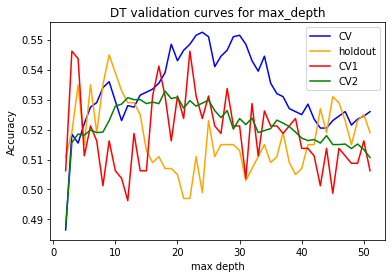

In [667]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.plot(max_depth_values, cv_accuracies_by_death_1, label='CV1', c='red')
plt.plot(max_depth_values, cv_accuracies_by_death_2, label='CV2', c='green')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [668]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []
cv_accuracies_by_death_1, cv_accuracies_by_death_2 = [], []
max_depth_values = np.arange(6, 20)

# for each value of max depth 
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = neigh = DecisionTreeClassifier(max_depth=curr_max_depth)

    # perform cross-validation (algorithm - KFold)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    #print(val_scores.shape)
    cv_accuracies_by_depth.append(val_scores.mean())

    # perfrom cross-validation (algorithm - ShuffleSplit)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=cv)
    #print(val_scores.shape)
    cv_accuracies_by_death_1.append(val_scores.mean())

    # prefrom cross-validation (algorithm - Repeat KFold)

    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=rskf)
    cv_accuracies_by_death_2.append(val_scores.mean())

    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    
    cuur_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


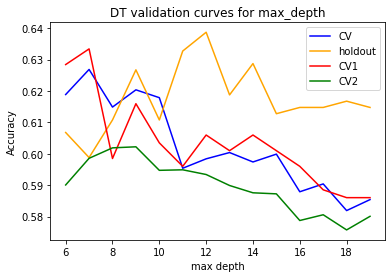

In [669]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.plot(max_depth_values, cv_accuracies_by_death_1, label='CV1', c='red')
plt.plot(max_depth_values, cv_accuracies_by_death_2, label='CV2', c='green')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [670]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []
cv_accuracies_by_death_1, cv_accuracies_by_death_2 = [], []
max_depth_values = np.arange(6, 20)

# for each value of max depth 
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = neigh = RandomForestClassifier(max_depth=curr_max_depth)

    # perform cross-validation (algorithm - KFold)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    #print(val_scores.shape)
    cv_accuracies_by_depth.append(val_scores.mean())

    # perfrom cross-validation (algorithm - ShuffleSplit)
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=cv)
    #print(val_scores.shape)
    cv_accuracies_by_death_1.append(val_scores.mean())

    # prefrom cross-validation (algorithm - Repeat KFold)

    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=rskf)
    cv_accuracies_by_death_2.append(val_scores.mean())

    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    
    cuur_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


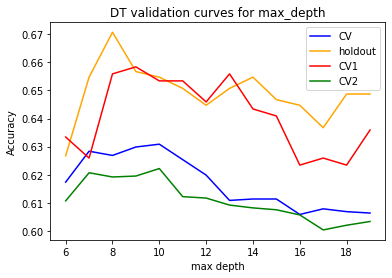

In [671]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.plot(max_depth_values, cv_accuracies_by_death_1, label='CV1', c='red')
plt.plot(max_depth_values, cv_accuracies_by_death_2, label='CV2', c='green')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [672]:
print(max(cv_accuracies_by_death_1))

0.6583541147132169


In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
rnd_clf = RandomForestClassifier(max_depth=9) 
dt_clf = DecisionTreeClassifier(random_state=17, max_depth=11)
knn_clf = KNeighborsClassifier(n_neighbors=43)
voting_clf = VotingClassifier(estimators=[ ('rnd', rnd_clf), ('knn', knn_clf), ('dt', dt_clf)], voting='hard')
params = {'max_depth': np.arange(2, 100)}
params1 = {'n_neighbors': np.arange(2, 100)}
best_neigh = GridSearchCV(estimator=rnd_clf, param_grid=params, scoring='accuracy', cv = cv)
best_neigh.fit(X_train, y_train)
best_neigh1 = GridSearchCV(estimator=dt_clf, param_grid=params, scoring='accuracy', cv = cv)
best_neigh1.fit(X_train, y_train)
best_neigh2 = GridSearchCV(estimator=knn_clf, param_grid=params1, scoring='accuracy', cv = cv)
best_neigh2.fit(X_train, y_train)
rnd_clf = RandomForestClassifier(max_depth=best_neigh.best_params_['max_depth']) 
dt_clf = DecisionTreeClassifier(random_state=17, max_depth=best_neigh1.best_params_['max_depth'])
knn_clf = KNeighborsClassifier(n_neighbors=best_neigh2.best_params_['n_neighbors'])
voting_clf = VotingClassifier(estimators=[('rnd', rnd_clf), ('knn', knn_clf), ('dt', dt_clf)], voting='hard')

In [675]:
print(best_neigh.best_params_)
print(best_neigh.best_score_)
print(best_neigh1.best_params_)
print(best_neigh1.best_score_)
print(best_neigh2.best_params_)
print(best_neigh2.best_score_)
rnd_clf = RandomForestClassifier(max_depth=8, random_state=241) 
dt_clf = DecisionTreeClassifier(random_state=241, max_depth=7)
knn_clf = KNeighborsClassifier(n_neighbors=121)
tree = VotingClassifier(estimators=[('rnd', rnd_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')

{'max_depth': 8}
0.6658354114713217
{'max_depth': 7}
0.6334164588528678
{'n_neighbors': 3}
0.5461346633416458


In [676]:
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=cv))
print(tree_cv_score)

0.6783042394014963


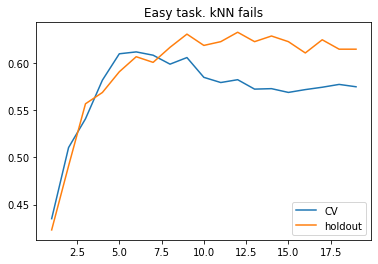

In [677]:
cv_scores, holdout_scores = [], []
n_neighb = np.arange(1, 20, 1)

for k in n_neighb:

    tree = DecisionTreeClassifier(random_state=234, max_depth=k)
    cv_scores.append(np.mean(cross_val_score(tree, X_train, y_train, cv=skf)))
    tree.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, tree.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend();

In [678]:
print(max(cv_scores))

0.6118881118881119


In [679]:
tree = DecisionTreeClassifier(random_state=17, max_depth=11)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=skf))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 0.5864135864135864, holdout: 0.6327345309381237


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

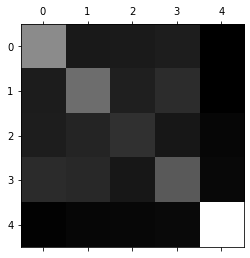

In [681]:
tree = DecisionTreeClassifier(random_state=17, max_depth=11)
#print(X_train.shape, y_train.shape)
y_pred = cross_val_predict(tree, X_train, y_train, cv = skf)
#print(y_train.shape, y_pred.shape)
conf_m = confusion_matrix(y_train, y_pred)
plt.matshow(conf_m, cmap=plt.cm.gray)
plt.show()

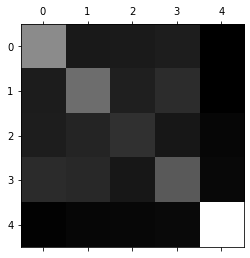

In [682]:
row_sums = conf_m.sum(axis=1,keepdims=True)
norm_conf_mx = conf_m / row_sums 
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(conf_m, cmap=plt.cm.gray)
plt.show()

In [0]:
from sklearn.metrics import classification_report

In [684]:
target_names = ['0', '1', '2', '3', '4']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59       413
           1       0.49      0.50      0.49       402
           2       0.35      0.33      0.34       278
           3       0.44      0.43      0.43       385
           4       0.92      0.89      0.90       524

    accuracy                           0.59      2002
   macro avg       0.55      0.55      0.55      2002
weighted avg       0.59      0.59      0.59      2002



In [685]:
lr_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(max_depth=9, random_state=17) 
dt_clf = DecisionTreeClassifier(random_state=17, max_depth=11)
knn_clf = KNeighborsClassifier(n_neighbors=43)
rnd_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
voting_clf = VotingClassifier(estimators=[ ('rnd', rnd_clf), ('knn', knn_clf), ('dt', dt_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rnd',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=9,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
          

In [686]:
y_pred = lr_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))
y_pred = rnd_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))
y_pred = dt_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))
y_pred = knn_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))
y_pred = voting_clf.predict(X_holdout)
print(accuracy_score(y_holdout, y_pred))

0.3872255489021956
0.6666666666666666
0.6327345309381237
0.5269461077844312
0.6646706586826348


In [687]:
tree = VotingClassifier(estimators=[('rnd', rnd_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=cv))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Voiting. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Voiting. CV: 0.628428927680798, holdout: 0.6646706586826348


In [740]:
from sklearn.ensemble import BaggingClassifier
temp, temp1 = 0, 0
a, b, c = 0, 0, 0
a1, b1, c1 = 0, 0, 0
for curr_max_depth in tqdm_notebook(np.arange(8, 9)):
    for curr_max_depth1 in np.arange(7, 8):
        for curr_n_neight in np.arange(100, 150):
            rnd_clf = RandomForestClassifier(max_depth=curr_max_depth, random_state=241) 
            dt_clf = DecisionTreeClassifier(random_state=241, max_depth=curr_max_depth1)
            knn_clf = KNeighborsClassifier(n_neighbors=curr_n_neight)
            tree = VotingClassifier(estimators=[('rnd', rnd_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')
            tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=cv))
            tree.fit(X_train, y_train)
            tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
            if temp < tree_cv_score:
                temp = tree_cv_score
                a = curr_max_depth
                b = curr_max_depth1
                c = curr_n_neight
            if temp1 < tree_holdout_score:
                temp1 = tree_holdout_score
                a1 = curr_max_depth
                b1 = curr_max_depth1
                c1 = curr_n_neight
print(temp)
print(a, b, c)
print(temp1)
print(a1, b1, c1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



0.6807980049875312
8 7 120
0.6367265469061876
8 7 104


In [0]:
from sklearn.ensemble import BaggingClassifier
dt_clf = RandomForestClassifier(random_state=241, max_depth=8 , n_jobs=-1, max_leaf_nodes=200)
#my_clf = BaggingClassifier(dt_clf, n_estimators=300, bootstrap = True, n_jobs=-1, oob_score=True)

In [738]:
print(np.mean(cross_val_score(dt_clf, X_train, y_train, cv=cv)))
#print(np.mean(cross_val_score(my_clf, X_train, y_train, cv=cv)))

0.6683291770573566


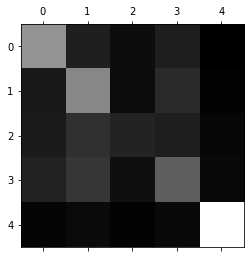

In [689]:
#print(X_train.shape, y_train.shape)
y_pred = cross_val_predict(tree, X_train, y_train, cv = skf)
#print(y_train.shape, y_pred.shape)
conf_m = confusion_matrix(y_train, y_pred)
plt.matshow(conf_m, cmap=plt.cm.gray)
plt.show()

In [690]:
target_names = ['0', '1', '2', '3', '4']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63       413
           1       0.48      0.62      0.54       402
           2       0.44      0.23      0.30       278
           3       0.45      0.45      0.45       385
           4       0.92      0.90      0.91       524

    accuracy                           0.61      2002
   macro avg       0.58      0.57      0.57      2002
weighted avg       0.61      0.61      0.61      2002

